In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

In [3]:
Auto = load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [6]:
X = MS(['horsepower']).fit_transform(Auto)
Y = Auto['mpg']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           7.03e-81
Time:                        11:33:07   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
"""
i. Higher horsepower leads to lower mpg
ii. A 100 increase in horsepower leads to 15.7 decrease in mpg
iii. negative
iv.
"""
new_df = pd.DataFrame({'horsepower':[98]})
design = MS(['horsepower'])
design = design.fit(Auto)
newX = design.transform(new_df)
new_predictions = results.get_prediction(newX)
print(new_predictions.predicted_mean)
print(new_predictions.conf_int(alpha=0.05))
print(new_predictions.conf_int(obs=True,alpha=0.05))


[24.46707715]
[[23.97307896 24.96107534]]
[[14.80939607 34.12475823]]


In [17]:
def abline(ax,b,m,*args,**kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b,m*xlim[1]+b]
    ax.plot(xlim,ylim,*args,**kwargs)

C:\Users\bdesi\AppData\Local\Temp\ipykernel_3380\240634143.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\bdesi\AppData\Local\Temp\ipykernel_3380\240634143.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


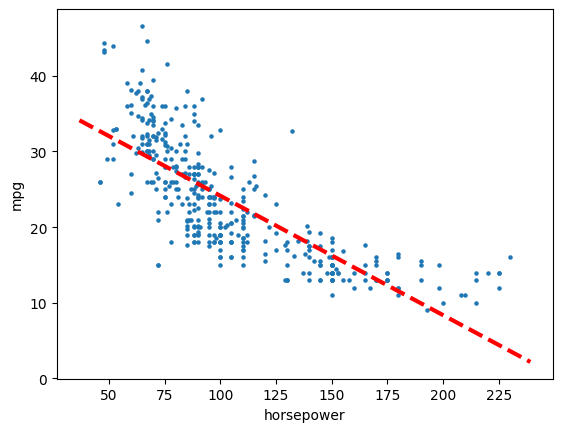

In [27]:
ax = Auto.plot.scatter('horsepower','mpg',s = 5)
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth = 3)

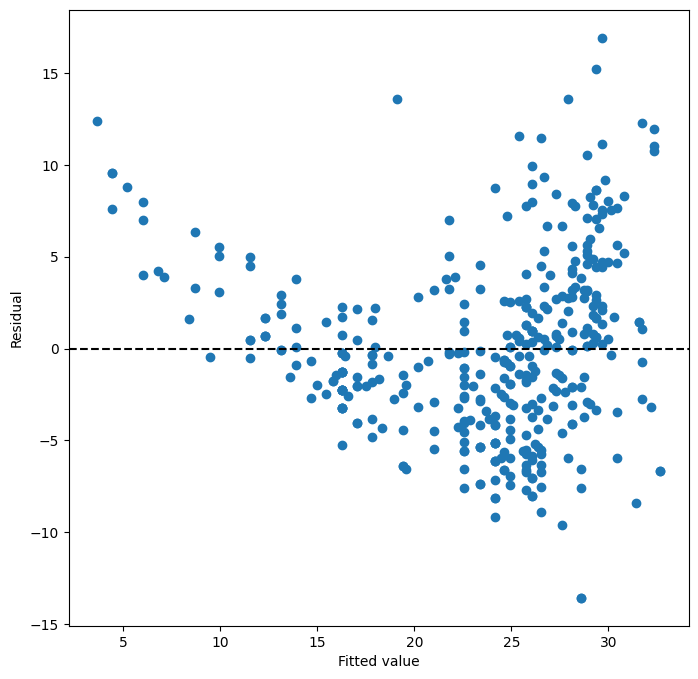

In [28]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

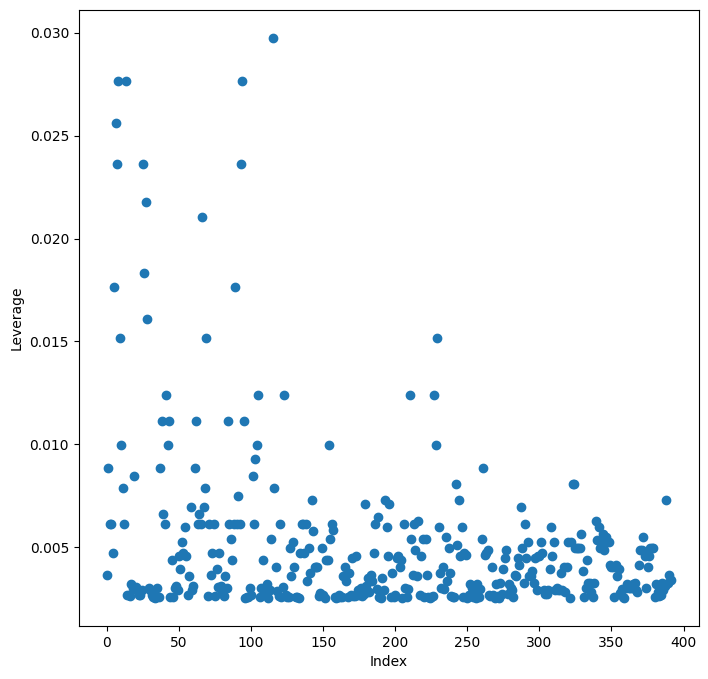

In [29]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)